In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

print("Libraries loaded successfully")


Libraries loaded successfully


In [3]:
cols = [
    "Start_Time","Start_Lat","Start_Lng","Severity",
    "Weather_Condition","Visibility(mi)",
    "Amenity","Bump","Crossing","Junction","Traffic_Signal"
]

print("Reading large file... please wait")

df = pd.read_csv(
    "US_Accidents_March23.csv",
    usecols=cols
)

print("Original size:", df.shape)

df = df.sample(300000, random_state=42)

print("After sampling:", df.shape)

df.head()


Reading large file... please wait
Original size: (7728394, 11)
After sampling: (300000, 11)


,Severity,Start_Time,Start_Lat,Start_Lng,Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Junction,Traffic_Signal
7133276,1,2020-04-17 09:29:30,26.706900,-80.119360,10.0,Mostly Cloudy,False,False,False,False,True
5363845,2,2022-04-21 10:01:00.000000000,38.781024,-121.265820,10.0,Mostly Cloudy,False,False,True,False,False
155993,3,2016-08-12 16:45:00,33.985249,-84.269348,10.0,Partly Cloudy,False,False,True,False,False
1861414,3,2019-09-20 15:22:16,47.118706,-122.556908,10.0,Cloudy,False,False,False,False,False
2021359,2,2019-06-03 16:55:43,33.451355,-111.890343,10.0,Fair,False,False,False,False,False


In [5]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="mixed", errors="coerce")

df["Hour"] = df["Start_Time"].dt.hour
df["Day"] = df["Start_Time"].dt.day_name()
df["Month"] = df["Start_Time"].dt.month

df[["Start_Time","Hour","Day","Month"]].head()


,Start_Time,Hour,Day,Month
7133276,2020-04-17 09:29:30,9,Friday,4
5363845,2022-04-21 10:01:00,10,Thursday,4
155993,2016-08-12 16:45:00,16,Friday,8
1861414,2019-09-20 15:22:16,15,Friday,9
2021359,2019-06-03 16:55:43,16,Monday,6


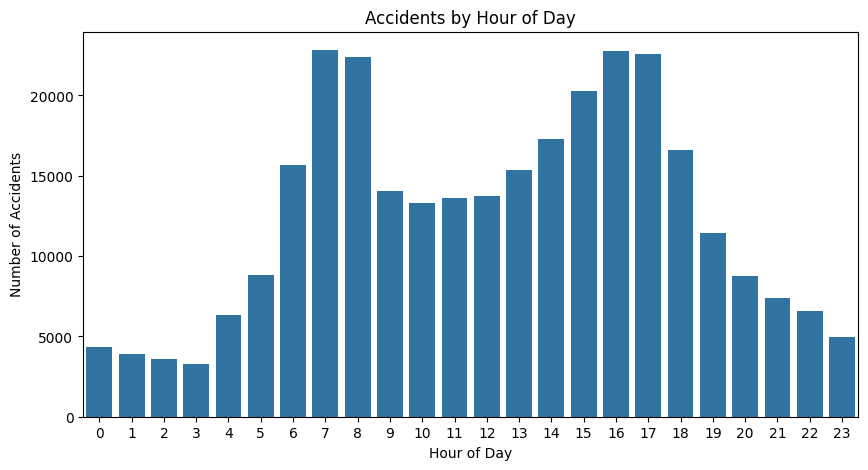

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

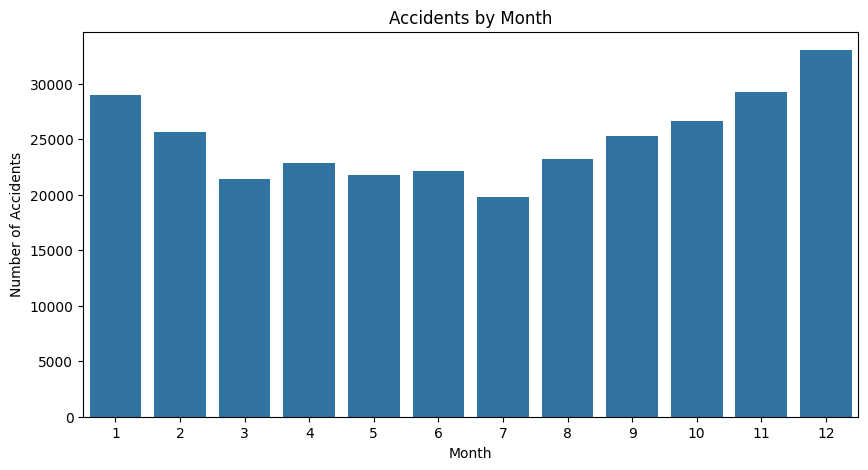

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x="Month", data=df)
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

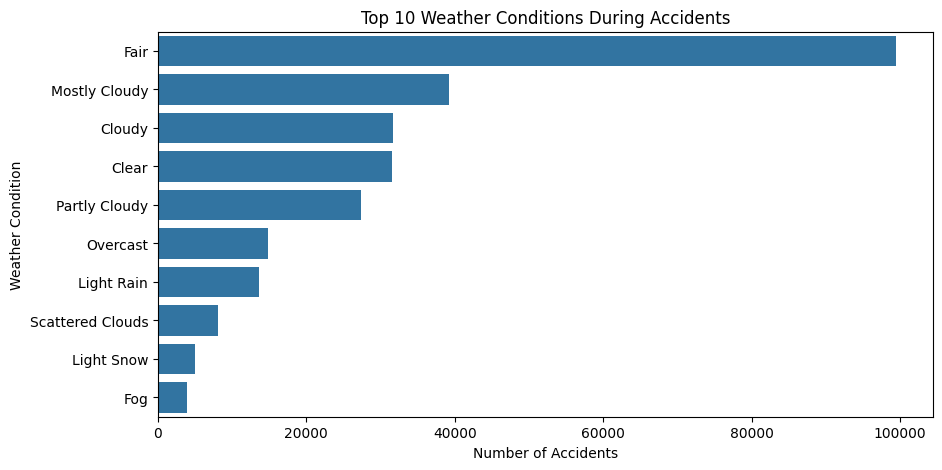

In [8]:
top_weather = df["Weather_Condition"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

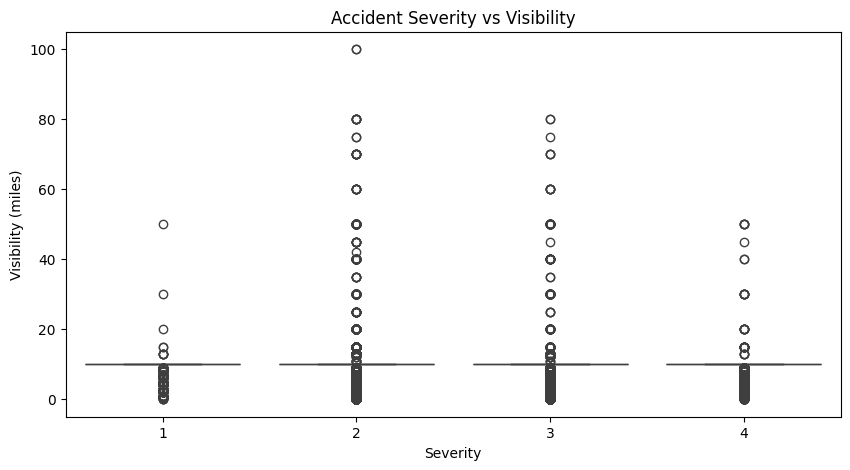

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Severity", y="Visibility(mi)", data=df)
plt.title("Accident Severity vs Visibility")
plt.xlabel("Severity")
plt.ylabel("Visibility (miles)")
plt.show()

In [10]:
hotspot_data = df[["Start_Lat", "Start_Lng"]].dropna().sample(20000, random_state=42)

m = folium.Map(location=[39, -98], zoom_start=4)

HeatMap(hotspot_data).add_to(m)

m

In [11]:
road_features = ["Amenity", "Bump", "Crossing", "Junction", "Traffic_Signal"]

road_counts = df[road_features].sum().sort_values(ascending=False)

road_counts

Traffic_Signal    44457
Crossing          33783
Junction          21920
Amenity            3701
Bump                137
dtype: int64

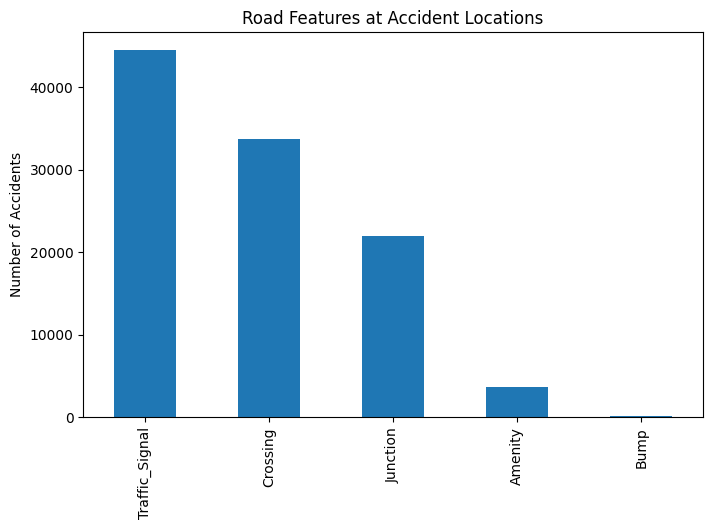

In [12]:
road_counts.plot(kind="bar", figsize=(8,5), title="Road Features at Accident Locations")
plt.ylabel("Number of Accidents")
plt.show()